# Base Imports

In [1]:
import numpy as np
from utils.dataset_utils import load_dataset
from models.model_builder import generate_model_summary
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
    VotingRegressor,
    BaggingRegressor
)

In [2]:
import warnings
warnings.simplefilter("ignore")

# Loading Dataset
The current dataset is being loaded with a StandardScaler on age, bmi and children columns and a OneHotEncoder on the region column.

In [3]:
X_train, X_test, y_train, y_test = load_dataset(
    "dataset/data.csv",
    **{
        "std_scaler": ["age", "bmi", "children"],
        # "min_max_scaler": ["age", "bmi", "children"],
        "one_hot_encoder": ["region"]
    }
)

# Building Models

# 1- LinearRegression with Ridge Regularization

In [4]:
lr_ridge = generate_model_summary(
    "lr_ridge",
    Ridge(),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "ridge__alpha": [0, 5, 10, 20],
            "ridge__max_iter": [1000, 1500, 2000],
        },
        "n_jobs": 3
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

MSE:
{'test': 18231470.57099238, 'train': 18217614.557389025}
R2:
{'test': 0.8621908409483714, 'train': 0.8379964352670441}
Grid Search:
{'best_params': {'polynomialfeatures__degree': 3, 'ridge__alpha': 5, 'ridge__max_iter': 1000}, 'cv_results': {'mean_fit_time': array([0.0053252 , 0.00461674, 0.00460541, 0.00410807, 0.00536752,
       0.0042429 , 0.00578201, 0.00521183, 0.00436461, 0.00521016,
       0.00618744, 0.0038166 , 0.00637364, 0.01215208, 0.00804591,
       0.00693476, 0.00702918, 0.00730264, 0.00747561, 0.007424  ,
       0.00693202, 0.00608444, 0.00741196, 0.01522398, 0.02393746,
       0.01881683, 0.01930749, 0.01009369, 0.0245291 , 0.01162553,
       0.0109123 , 0.01012158, 0.01055217, 0.00992239, 0.01027536,
       0.00985277, 0.08262384, 0.10686564, 0.096012  , 0.02098453,
       0.01878226, 0.02164114, 0.02164841, 0.02180052, 0.02249134,
       0.0222249 , 0.02213645, 0.02203774]), 'std_fit_time': array([4.82439995e-04, 1.83105469e-04, 2.94804573e-04, 3.99351120e-05,
 

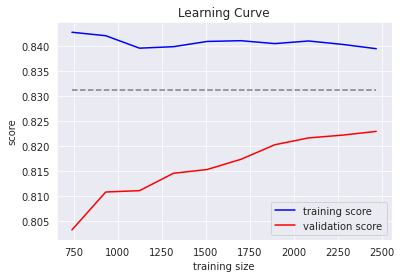

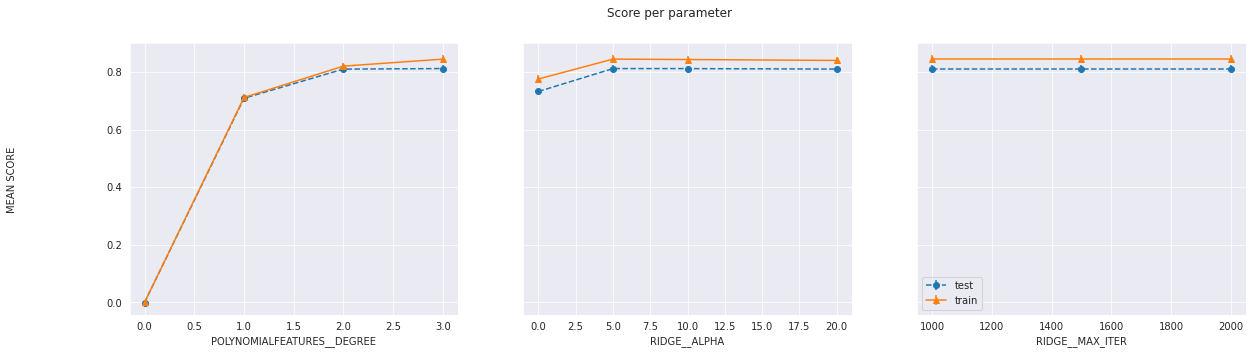

In [5]:
lr_ridge.to_json("dist/result.json")
lr_ridge.display()

# 2- LinearRegression with Ridge Regularization and RFE

In [6]:
lr_ridge_rfe = generate_model_summary(
    "lr_ridge_rfe",
    Ridge(),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    rfe={
        "estimator": Ridge(),
    },
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "ridge__alpha": [0, 5, 10, 20],
            "ridge__max_iter": [1000, 1500, 2000],
        },
        "n_jobs": 3
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },

)

MSE:
{'test': 18948674.968745925, 'train': 18630817.15530067}
R2:
{'test': 0.8567695923147147, 'train': 0.834321953429275}
Grid Search:
{'best_params': {'polynomialfeatures__degree': 3, 'ridge__alpha': 10, 'ridge__max_iter': 1000}, 'cv_results': {'mean_fit_time': array([0.00366092, 0.00413775, 0.00376856, 0.00455213, 0.00457537,
       0.00368667, 0.00474536, 0.00375247, 0.00435531, 0.00486445,
       0.00381196, 0.00349152, 0.01349199, 0.01589906, 0.0177964 ,
       0.01221168, 0.00990939, 0.01788151, 0.01809013, 0.01402688,
       0.01503932, 0.01893938, 0.0227468 , 0.01946485, 0.10441315,
       0.09930122, 0.09739816, 0.09738731, 0.11245489, 0.08250034,
       0.13396883, 0.07157075, 0.0758698 , 0.09252644, 0.10211992,
       0.12776482, 1.44790673, 1.37807322, 1.34955406, 1.49245763,
       1.27004135, 1.3373543 , 1.19649553, 1.34407258, 1.37919986,
       1.51968193, 1.5095005 , 1.06900465]), 'std_fit_time': array([4.45842743e-05, 3.89814377e-04, 2.73585320e-04, 1.15466118e-03,
 

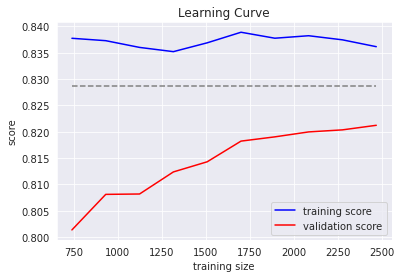

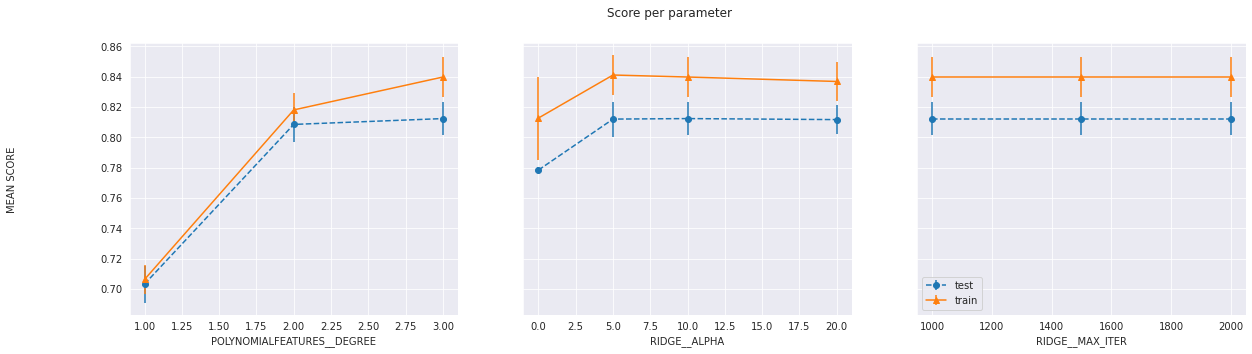

In [7]:
lr_ridge_rfe.to_json("dist/result.json")
lr_ridge_rfe.display()

# 3- Linear Regression with Lasso Regularization

In [8]:
lr_lasso = generate_model_summary(
    "lr_lasso",
    Lasso(),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "lasso__alpha": [0, 5, 10, 20],
            "lasso__max_iter": [1000, 1500, 2000],
        },
        "n_jobs": 3
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

/home/allonios/PycharmProjects/health_insurance_cost_prediction/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/allonios/PycharmProjects/health_insurance_cost_prediction/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/allonios/PycharmProjects/health_insurance_cost_prediction/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/allonios/PycharmProjects/health_insurance_cost_prediction/.venv/lib/python3.10/site-package

MSE:
{'test': 18105438.200722776, 'train': 18893823.00078074}
R2:
{'test': 0.8631435021663739, 'train': 0.8319831244690314}
Grid Search:
{'best_params': {'lasso__alpha': 20, 'lasso__max_iter': 1000, 'polynomialfeatures__degree': 3}, 'cv_results': {'mean_fit_time': array([0.00495422, 0.0265671 , 0.14067614, 0.58001125, 0.00543594,
       0.04687893, 0.1744293 , 0.68550825, 0.00785673, 0.09036231,
       0.24255157, 0.90972674, 0.00354719, 0.00437474, 0.01114643,
       0.11178315, 0.00552201, 0.00782788, 0.02028179, 0.12676084,
       0.00761557, 0.01264369, 0.02032423, 0.15416849, 0.00642824,
       0.00696623, 0.01583552, 0.0977211 , 0.00622988, 0.00647759,
       0.01350176, 0.08442891, 0.00644183, 0.00638342, 0.01377988,
       0.08648896, 0.00617814, 0.00651896, 0.01209056, 0.04755938,
       0.00631833, 0.00669587, 0.01235175, 0.04612696, 0.00602043,
       0.00686729, 0.01176465, 0.05327451]), 'std_fit_time': array([4.20808792e-05, 4.14526463e-03, 3.01121473e-02, 1.15621090e-03,


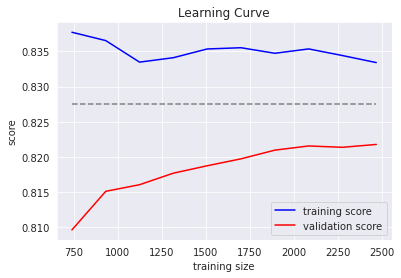

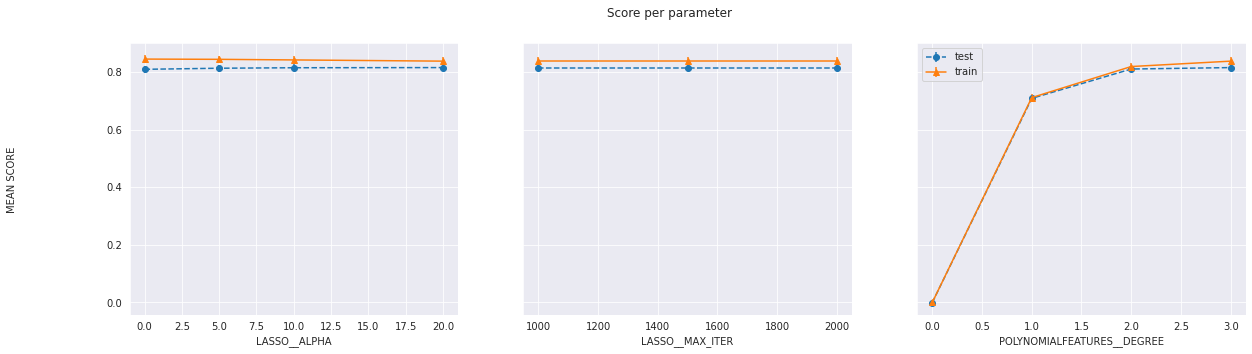

In [9]:
lr_lasso.to_json("dist/result.json")
lr_lasso.display()

# 4- Linear Regression with Lasso Regularization and RFE

In [10]:
lr_lasso_rfe = generate_model_summary(
    "lr_lasso_rfe",
    Lasso(),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    rfe={
        "estimator": Ridge(),
    },
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "lasso__alpha": [0, 5, 10, 20],
            "lasso__max_iter": [1000, 1500, 2000],
        },
        "n_jobs": 3
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

/home/allonios/PycharmProjects/health_insurance_cost_prediction/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/allonios/PycharmProjects/health_insurance_cost_prediction/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/allonios/PycharmProjects/health_insurance_cost_prediction/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.525e+10, tolerance: 1.785e+07 Linear regression models with null 

KeyboardInterrupt: 

In [ ]:
lr_lasso_rfe.to_json("dist/result.json")
lr_lasso_rfe.display()

# 5- DecisionTreeRegressor

In [ ]:
decision_tree = generate_model_summary(
    "decision_tree",
    DecisionTreeRegressor(),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "decisiontreeregressor__min_samples_leaf": [1, 2, 4, 6, 8],
            "decisiontreeregressor__max_depth": [1, 2, 4, 6, 8],
        },
        "n_jobs": 3
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

In [ ]:
decision_tree.to_json("dist/result.json")
decision_tree.display()

# 6- Linear SVR

In [ ]:
linear_svr = generate_model_summary(
    "linear_svr",
    LinearSVR(),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "linearsvr__epsilon": [0, 0.5, 1.0, 1.5, 2],
            "linearsvr__C": [0, 1, 5, 20, 50],
            "linearsvr__max_iter": [1000, 1500, 2000],
        },
        "n_jobs": 3
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

In [ ]:
linear_svr.to_json("dist/result.json")
linear_svr.display()

# 6- SVR


In [ ]:
svr = generate_model_summary(
    "svr",
    SVR(),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "svr__epsilon": [0, 0.5, 1.0, 1.5, 2],
            "svr__degree": [1, 2],
            "svr__gamma": [0.1, 1, 10],
            "svr__C": [0.001, 1, 10, 100],
            "svr__kernel": ["linear", "ploy", "rbf"],
            # "svr__max_iter": [1000, 1500, 2000],
        },
        "n_jobs": 3
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

In [ ]:
svr.to_json("dist/result.json")
svr.display()

# 7- AdaBoostRegressor with LinearRegression

In [ ]:
ada_boost_ridge = generate_model_summary(
    "ada_boost_ridge",
    AdaBoostRegressor(
        Ridge(alpha=5)
    ),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "adaboostregressor__n_estimators": [50, 100, 200],
            "adaboostregressor__learning_rate": [0.001, 0.01],
        },
        "n_jobs": 4
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

In [ ]:
ada_boost_ridge.to_json("dist/result.json")
ada_boost_ridge.display()

# 8- AdaBoostRegressor with DecisionTreeRegressor


In [ ]:
ada_boost_tree = generate_model_summary(
    "ada_boost_tree",
    AdaBoostRegressor(
        DecisionTreeRegressor(max_depth=6, min_samples_leaf=6)
    ),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "adaboostregressor__n_estimators": [50, 100, 200],
            "adaboostregressor__learning_rate": [0.001, 0.01],
        },
        "n_jobs": 4
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

In [ ]:
ada_boost_tree.to_json("dist/result.json")
ada_boost_tree.display()

# 9- GradientBoostingRegressor

In [ ]:
gradient_boost = generate_model_summary(
    "gradient_boost",
    GradientBoostingRegressor(),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "gradientboostingregressor__max_depth": [1, 2, 4, 6, 8],
            "gradientboostingregressor__learning_rate": [0.001, 0.01],
            "gradientboostingregressor__n_estimators": [50, 100, 200],
        },
        "n_jobs": 4
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

In [ ]:
gradient_boost.to_json("dist/result.json")
gradient_boost.display()

# 10- RandomForestRegressor

In [ ]:
random_forest = generate_model_summary(
    "random_forest",
    RandomForestRegressor(),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "randomforestregressor__max_leaf_nodes": [4, 8, 16],
            "randomforestregressor__n_estimators": [50, 100, 200],
        },
        "n_jobs": 4
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

In [ ]:
random_forest.to_json("dist/result.json")
random_forest.display()

# 11- VotingRegressor

In [ ]:
voting = generate_model_summary(
    "voting",
    VotingRegressor(
        estimators=[
            ("lr", Ridge(alpha=5)),
            ("dt", DecisionTreeRegressor(max_depth=6, min_samples_leaf=6))
        ]
    ),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
        },
        "n_jobs": 4
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

In [ ]:
voting.to_json("dist/result.json")
voting.display()

# 12- BaggingRegressor with LinearRegression

In [ ]:
bagging_ridge = generate_model_summary(
    "bagging_ridge",
    BaggingRegressor(
        Ridge(alpha=5)
    ),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "baggingregressor__n_estimators": [100, 200, 300],
            "baggingregressor__max_samples": [50, 100],
            # for testing bagging a pasting.
            "baggingregressor__bootstrap": [True, False],
        },
        "n_jobs": 4
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

In [ ]:
bagging_ridge.to_json("dist/result.json")
bagging_ridge.display()

# 13- Bagging with DecisionTreeRegressor

In [ ]:
bagging_tree = generate_model_summary(
    "bagging_tree",
    DecisionTreeRegressor(
        max_depth=6, min_samples_leaf=6
    ),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "baggingregressor__n_estimators": [100, 200, 300],
            "baggingregressor__max_samples": [50, 100],
            # for testing bagging a pasting.
            "baggingregressor__bootstrap": [True, False],
        },
        "n_jobs": 4
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

In [ ]:
bagging_tree.to_json("dist/result.json")
bagging_tree.display()